In [ ]:
!pip install torch torchvision
!pip install ultralytics

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import requests
import cv2
import os
from ultralytics import YOLO

In [ ]:
abs_path = '/content/drive/Othercomputers/MacBook Pro (Personal)/Documents/COLUMBIA UNIVERSITY/MSCS/Research/Knolling Bot/Preliminary Pipeline/'

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
model = YOLO('yolov8n.pt')
model.to(device)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")

    transform = transforms.Compose([
        transforms.ToTensor(),
    ])

    image_tensor = transform(image).unsqueeze(0).to(device)

    return image, image_tensor


0: 128x128 (no detections), 32.3ms
Speed: 0.0ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 1 kite, 44.7ms
Speed: 0.0ms preprocess, 44.7ms inference, 6.4ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 1 kite, 21.9ms
Speed: 0.0ms preprocess, 21.9ms inference, 1.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 2 traffic lights, 19.8ms
Speed: 0.0ms preprocess, 19.8ms inference, 1.4ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 1 airplane, 28.0ms
Speed: 0.0ms preprocess, 28.0ms inference, 1.4ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 1 kite, 27.1ms
Speed: 0.0ms preprocess, 27.1ms inference, 1.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 3 traffic lights, 20.3ms
Speed: 0.0ms preprocess, 20.3ms inference, 1.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 1 kite, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 1.1ms postprocess per image a

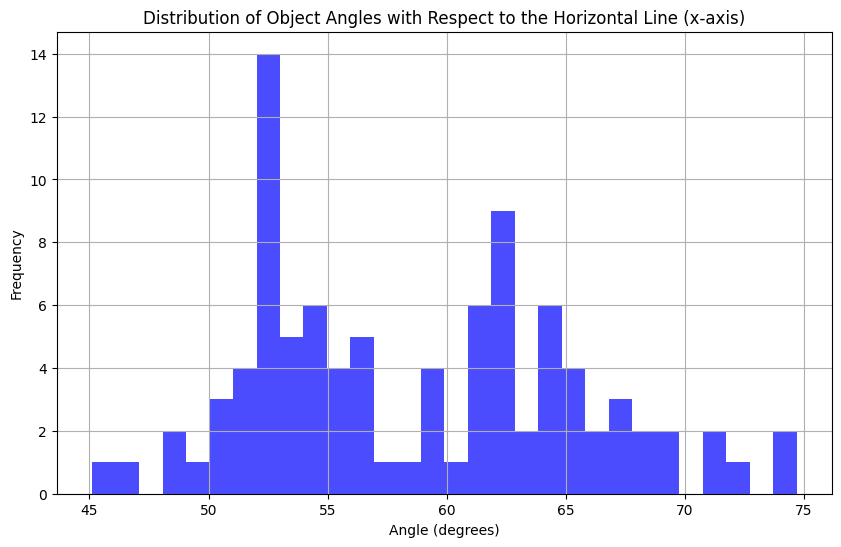

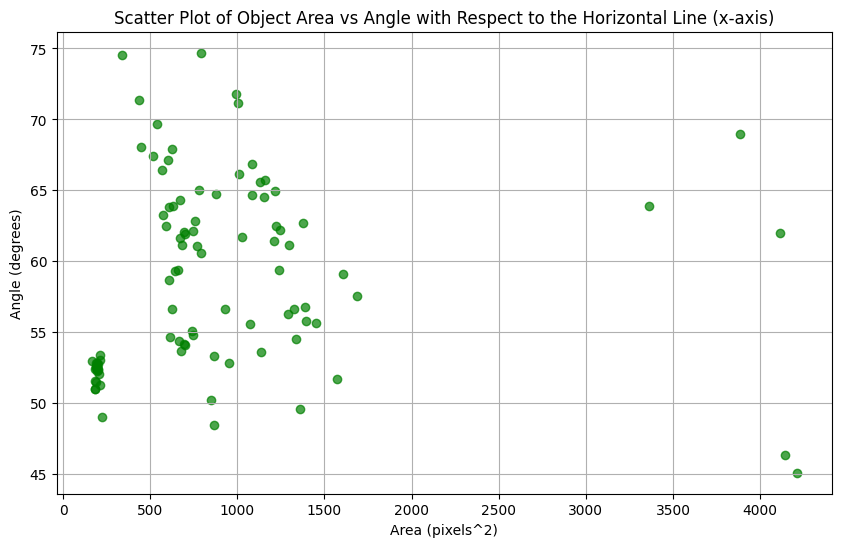

In [ ]:
angles = []
areas = []
images_after_dir = abs_path + 'data/images_before_small/'

for filename in os.listdir(images_after_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        image_path = os.path.join(images_after_dir, filename)
        image, image_tensor = preprocess_image(image_path)

        with torch.no_grad():
            results = model(image_tensor)

        results_xyxy = results[0].boxes.xyxy.cpu().numpy()
        scores = results[0].boxes.conf.cpu().numpy()
        labels = results[0].boxes.cls.cpu().numpy()

        threshold = 0.4
        filtered_boxes = [box for box, score in zip(results_xyxy, scores) if score >= threshold]

        for box in filtered_boxes:
            x_min, y_min, x_max, y_max = box
            dx = x_max - x_min
            dy = y_max - y_min
            angle = np.arctan2(dy, dx) * 180.0 / np.pi
            area = dx * dy
            angles.append(angle)
            areas.append(area)

plt.figure(figsize=(10, 6))
plt.hist(angles, bins=30, color='b', alpha=0.7)
plt.xlabel('Angle (degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Object Angles with Respect to the Horizontal Line (x-axis)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(areas, angles, alpha=0.7, color='g')
plt.xlabel('Area (pixels^2)')
plt.ylabel('Angle (degrees)')
plt.title('Scatter Plot of Object Area vs Angle with Respect to the Horizontal Line (x-axis)')
plt.grid(True)
plt.show()


0: 128x128 (no detections), 24.8ms
Speed: 0.0ms preprocess, 24.8ms inference, 0.9ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 1 traffic light, 39.2ms
Speed: 0.0ms preprocess, 39.2ms inference, 2.4ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 31.8ms
Speed: 0.0ms preprocess, 31.8ms inference, 1.2ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 77.8ms
Speed: 0.0ms preprocess, 77.8ms inference, 1.2ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 54.3ms
Speed: 0.0ms preprocess, 54.3ms inference, 1.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 1 traffic light, 31.8ms
Speed: 0.0ms preprocess, 31.8ms inference, 1.5ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 32.7ms
Speed: 0.0ms preprocess, 32.7ms inference, 1.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 40.3ms
Speed: 0.0ms preprocess, 40.3ms i

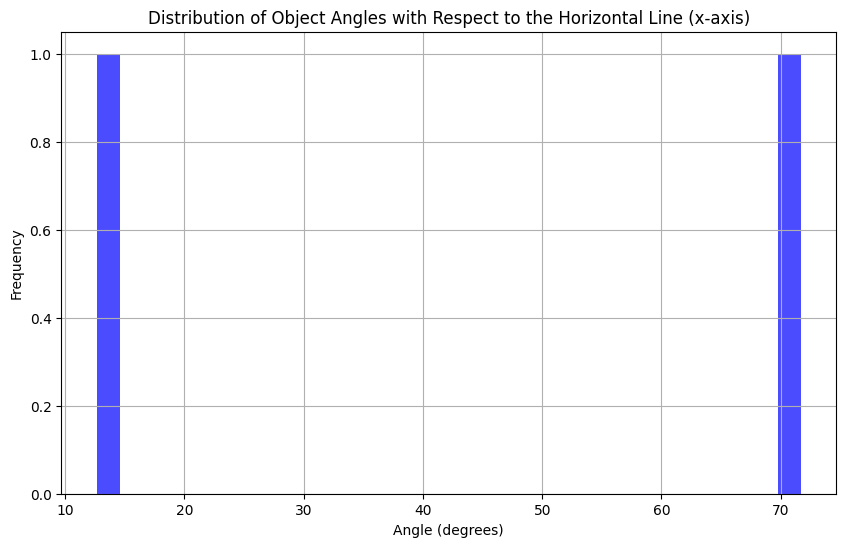

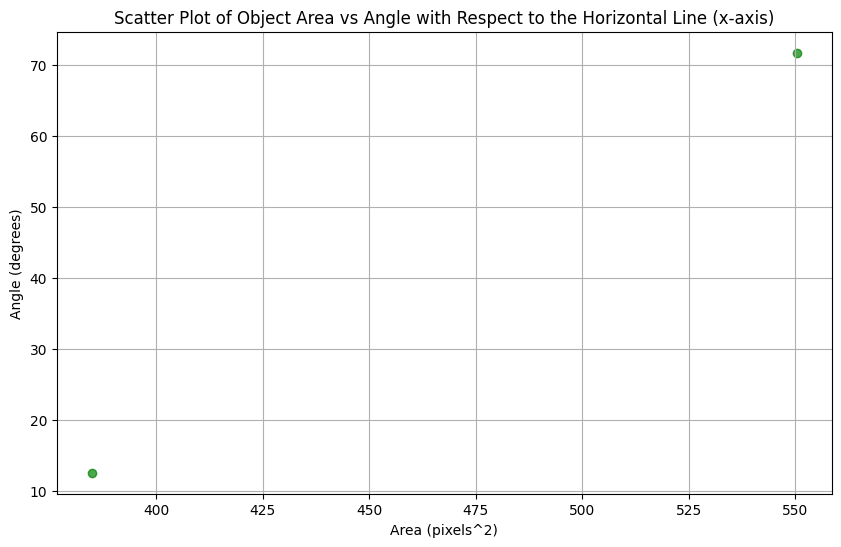

In [ ]:
angles = []
areas = []
images_after_dir = abs_path + 'data/images_after_small/'  # Directory containing tidy images

for filename in os.listdir(images_after_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        image_path = os.path.join(images_after_dir, filename)
        image, image_tensor = preprocess_image(image_path)

        with torch.no_grad():
            results = model(image_tensor)

        results_xyxy = results[0].boxes.xyxy.cpu().numpy()
        scores = results[0].boxes.conf.cpu().numpy()
        labels = results[0].boxes.cls.cpu().numpy()

        threshold = 0.4
        filtered_boxes = [box for box, score in zip(results_xyxy, scores) if score >= threshold]

        for box in filtered_boxes:
            x_min, y_min, x_max, y_max = box
            dx = x_max - x_min
            dy = y_max - y_min
            angle = np.arctan2(dy, dx) * 180.0 / np.pi
            area = dx * dy
            angles.append(angle)
            areas.append(area)

plt.figure(figsize=(10, 6))
plt.hist(angles, bins=30, color='b', alpha=0.7)
plt.xlabel('Angle (degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Object Angles with Respect to the Horizontal Line (x-axis)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(areas, angles, alpha=0.7, color='g')
plt.xlabel('Area (pixels^2)')
plt.ylabel('Angle (degrees)')
plt.title('Scatter Plot of Object Area vs Angle with Respect to the Horizontal Line (x-axis)')
plt.grid(True)
plt.show()